Making a LHS2686 spectrum that doesn't have flares - useful for T-1 comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import cm
from scipy import interpolate
from astropy.convolution import convolve, Box1DKernel, convolve_fft, Gaussian1DKernel
import matplotlib.patches as mpatches
from astropy.modeling import models, fitting
from astropy.units import cds
cds.enable()

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

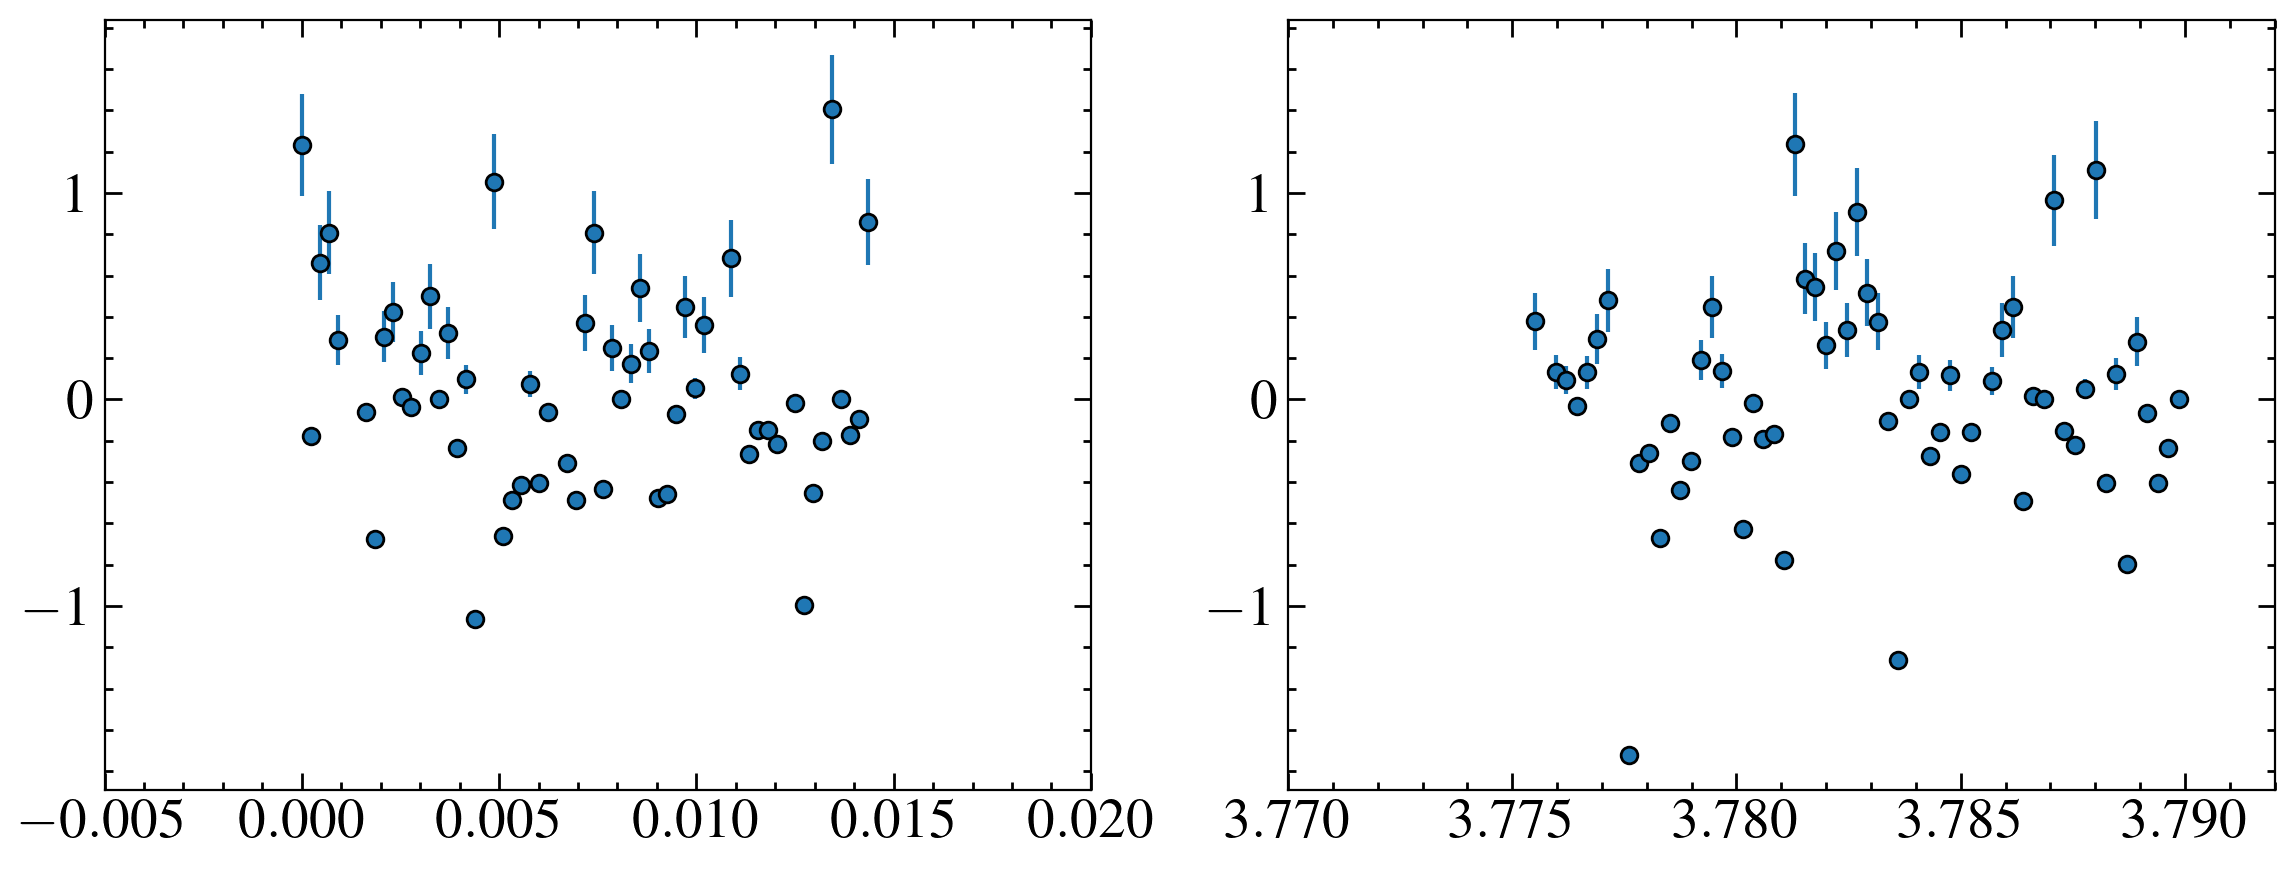

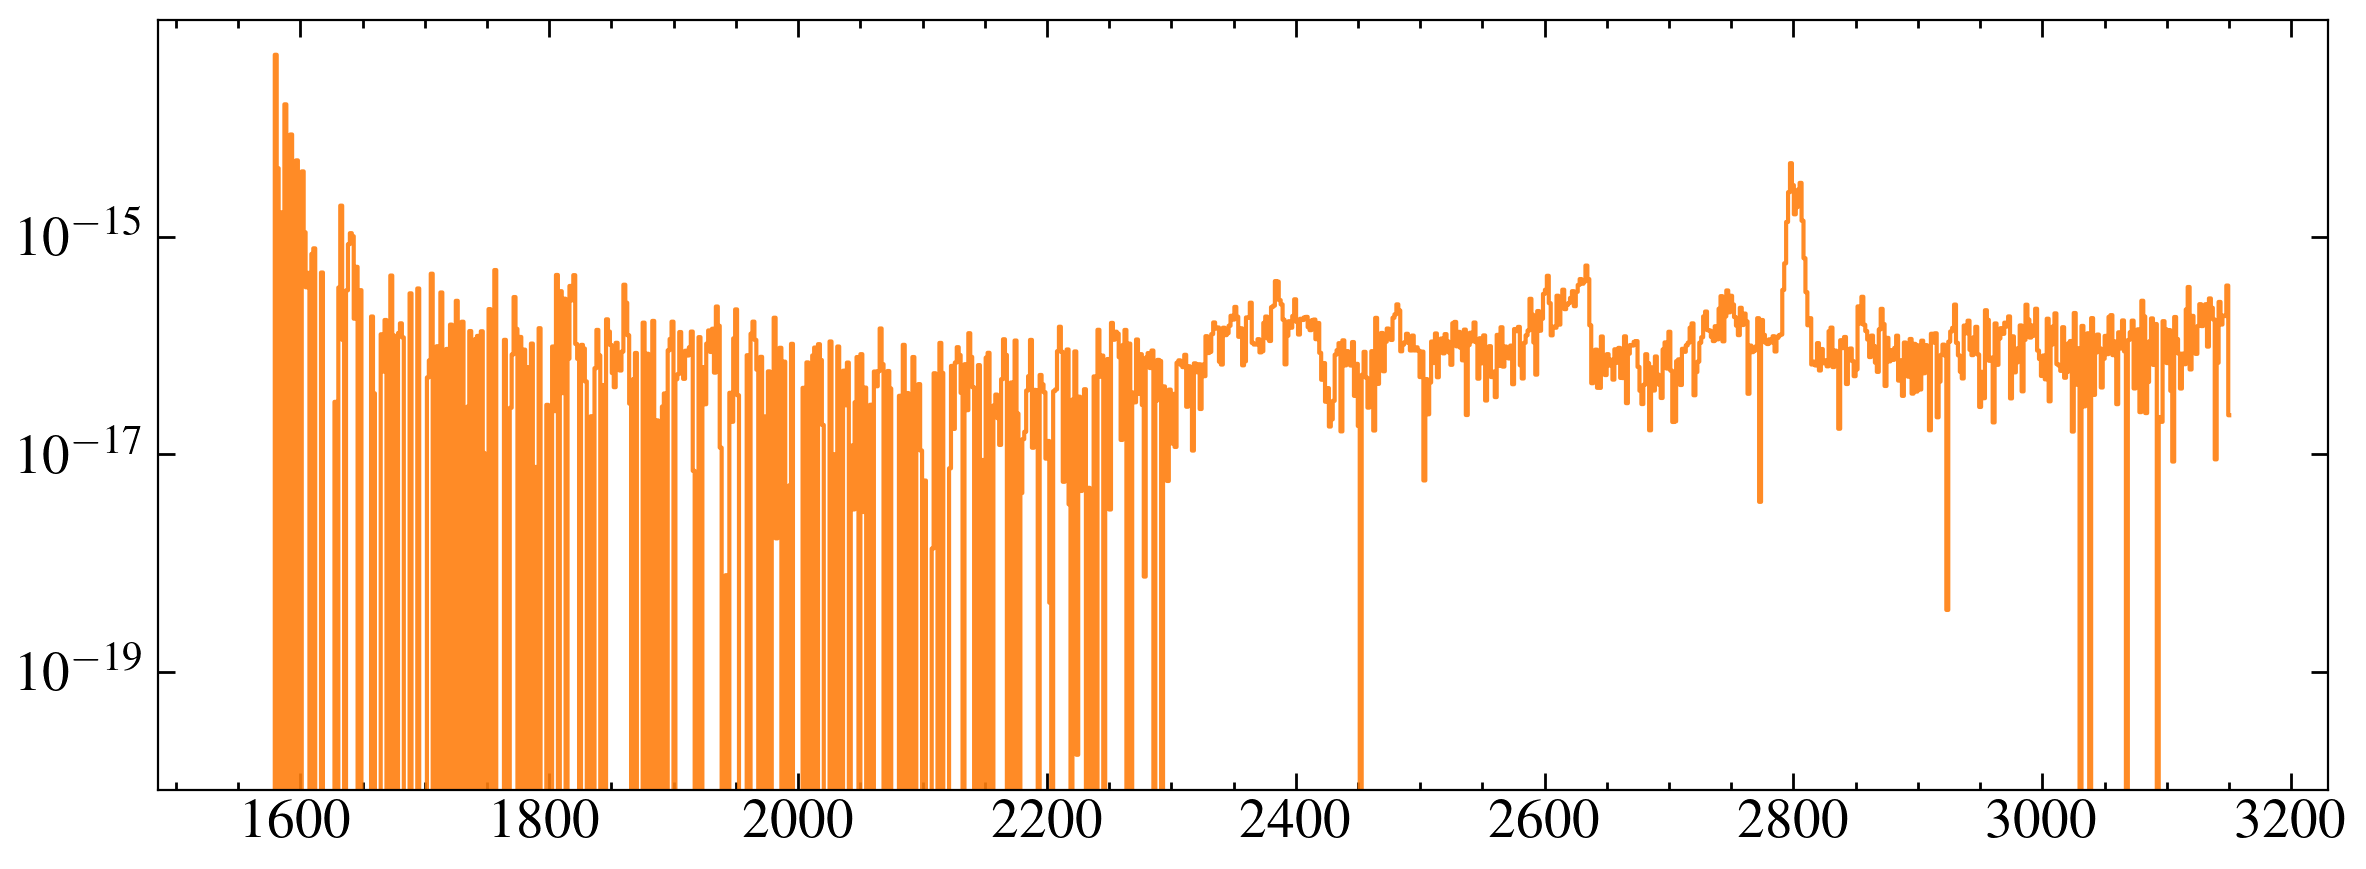

In [12]:
flarepath = '/media/david/2tb_ext_hd/hddata/mega_muscles/flare_search/output/g230l/'
flare_roots  = ['ODLM34020', 'ODLM35020']

data = fits.getdata('/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/LHS-2686/hlsp_muscles_hst_stis_lhs-2686_g230l_v24_component-spec.fits', 1)
sw, sf, se = data['WAVELENGTH'], data['FLUX'], data['ERROR']

lc = Table.read('{}../../light_curves/LHS-2686_g230l_20s_lc.ecsv'.format(flarepath))

# for root in 
fig, ax = plt.subplots(ncols =2)
t0 = np.min(lc['MJD'])
for i in range(2):
    ax[i].errorbar(lc['MJD']-t0, lc['COUNTS'], yerr=lc['COUNTS_ERROR'], marker='o', markeredgecolor='k', ls='none')
    if i == 0:
        ax[i].set_xlim(-0.005, 0.02)
    else:
        ax[i].set_xlim(3.77, 3.792)
        
plt.show()

fs = []

# fig, ax = plt.subplots()
for i, root in enumerate(flare_roots):
    x = '{}{}_20s_x1d.fits'.format(flarepath, root.lower())
    hdul = fits.open(x)
    for j, ext in enumerate(hdul[1::]): #spectra in every extension after the first
        data = ext.data[0]
        mask =data['WAVELENGTH'] > 1160
        # ax.step(data['WAVELENGTH'][mask], data['FLUX'][mask], where='mid', alpha=0.5)
        if i == 0:
            if j > 40:
                fs.append(data['FLUX'])
        else:
                fs.append(data['FLUX'])
# # plt.show()

outflare = np.mean(fs, axis =0)
fig, ax = plt.subplots()
# ax.step(sw[smask], sf[smask], where='mid', c='C0', alpha=0.9)
ax.step(data['WAVELENGTH'][mask], outflare[mask], where='mid', alpha=0.9, c='C1')

ax.set_yscale('log')

plt.show()

Flares aren't bright enough to make a difference.